# Regression Models

Regression aims to estimate the world state $w$ for a given observations $\mathbf{x}$ by modeling $P(w|\mathbf{x})$ based on obtained data $\{\mathbf{x}_{i}, w_{i}\}_{i=1}^N$.

## Table of contents:
* [Maximum Likelihood Linear Regression](#ml-linear-regression)
* [Bayesian linear regression](#bayesian-linear-regression)
* [Non-linear regression - Maximum Likelihood](#non-linear-regression-ml)
* [Non-linear regression - Bayesian Inference](#non-linear-regression-bayes)
* [Kernels and Gaussian process regression](#kernel-gaussian-process-regression)
* [Sparse linear regression](#sparse-linear-regression)
* [Dual linear regression](#dual-linear-regression)
* [Relevance vector regression](#relevant-vector-regression)
* [Regression to multivariate data](#multivariate-data)

# Bayesian linear regression <a class="anchor" id="bayesian-linear-regression"></a>


The likelihood reads as follows.
$$\begin{align}
p(\Theta|\mathbf{X}, \mathbf{w}) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \Theta)p(\Theta)}{p(\mathbf{w}|\mathbf{X})}
\end{align}$$
Suppose we know $\sigma$,
$$\begin{align}
p(\phi|\mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi)}{p(\mathbf{w}|\mathbf{X})}
\end{align}$$
Here we perform the maximum likelihood estimations for $\Theta$.
Suppose $\mathbf{x}_{i} = (1, \tilde{\mathbf{x}}_{i}^{T})^{T}$, $\mathbf{X} = (\mathbf{x}_{1}, \cdots, \mathbf{x}_{N})$, $\mathbf{w} = (w_{1}, \cdots, w_{N})^{T}$,  $\Theta = (\phi_{0}, \phi_{1}, \sigma)$ and $\mathbf{\phi} = (\phi_{0}, \phi_{1})^{T}$


$$\begin{align}
\mathbf{X} \quad & : &\quad (D \times N)\\
\mathbf{w} \quad & : &\quad (N \times 1)\\
\mathbf{\phi} \quad & : &\quad (D \times 1)
\end{align}$$
This is just for clarity regarding the dimensions of each variable.
$$\begin{align}
prior :\qquad p(\phi) \quad & = &\quad Norm_{\phi}(\mathbf{0}, \sigma_{p}^{2}\mathbf{I}_{D \times D}) \quad & = &\quad \#'
exp \bigg(-\frac{\mathbf{\phi}^{T} \mathbf{\phi}}{2\sigma_{p}^{2}}\bigg)\\
likelihood :\qquad p(\mathbf{w}|\mathbf{X}, \Theta) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{X}^{T}\phi, \sigma\mathbf{I}_{N \times N}) \quad & = &\quad  \#
exp \bigg(-\frac{(\mathbf{w} - \mathbf{X}^{T}\phi)^{T}(\mathbf{w} - \mathbf{X}^{T}\phi)}{2\sigma^{2}} \bigg)
\end{align}$$

Using these, let us calculate the posterior $p(\phi|\mathbf{X}, \mathbf{w}, \sigma)$, which will be used for computing the predictive probability distribution over $w^{*}$.
$$\begin{align}
p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2}\mathbf{I}_{N \times N} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X}) Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg) \quad & = &\quad p(\mathbf{w}|\mathbf{X}, \sigma) p(\phi|\mathbf{X}, \mathbf{w}, \sigma)\\
evidence :\qquad p(\mathbf{w}|\mathbf{X}, \sigma)  \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2}\mathbf{I}_{N \times N} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X})\\
posterior :\qquad p(\phi|\mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi) }{ p(\mathbf{w}|\mathbf{X}, \sigma) \int d\mathbf{\phi}p(\phi|\mathbf{X}, \mathbf{w}, \sigma)}  \quad & = &\quad  
Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg)
\end{align}$$
, where $C$ is
$$\begin{align}
C \quad & \equiv & \quad \frac{1}{\sigma_{p}^{2}}\mathbf{I}_{D \times D} + \frac{1}{\sigma^{2}}\mathbf{X}\mathbf{X}^{T}\\
C^{-1} \quad & = &\quad \sigma_{p}^{2}\mathbf{I}_{D \times D} -  \sigma_{p}^{2} \mathbf{X}\bigg(\mathbf{X}^{T}\mathbf{X} +\frac{\sigma^{2}}{\sigma_{p}^{2}}\mathbf{I}_{N \times N}\bigg)^{-1}\mathbf{X}^{T}
\end{align}$$
The derivation should remind us of the relations from the section on the factor analysis.
<br>
<br>
Now, suppose we would like to compute the predictive probability distribution over $w^{*}$ for a new observation $\mathbf{x}^{*}$ based on the posterior obtained above.
$$\begin{align}
p(w^{*}|\mathbf{x}^{*}, \mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \int d\mathbf{\phi} p(w^{*}|\mathbf{x}^{*}, \phi, \sigma)p(\phi|\mathbf{X}, \mathbf{w}, \sigma)\\
\quad & = &\quad \int d\mathbf{\phi} Norm_{\mathbf{w}}(\mathbf{\phi}^{T}\mathbf{x}^{*}, \sigma^{2}) Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg)\\
\quad & = &\quad Norm_{w^{*}}\bigg(\frac{1}{\sigma^{2}}\mathbf{x}^{*T}C^{-1}\mathbf{X}\mathbf{w}, \quad \mathbf{x}^{*T}C^{-1}\mathbf{x}^{*} + \sigma^{2}\bigg)\\
\end{align}$$
<br>

Notice that we did not calculate the posterior with respect to $\sigma$. In order to compute the posterior $p(\sigma|\mathbf{X}, \mathbf{w})$, as the first step, we integrate out (marginalize) $\mathbf{\phi}$.

$$\begin{align}
\int d\mathbf{\phi} p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi)p(\sigma) \quad & = &\quad \int d\mathbf{\phi} p(\mathbf{w}|\mathbf{X}, \sigma) p(\phi|\mathbf{X}, \mathbf{w}, \sigma)p(\sigma)\\
 \quad & = &\quad p(\mathbf{w}|\mathbf{X}, \sigma) p(\sigma)\\
\end{align}$$
, readily:
$$\begin{align}
posterior :\qquad p(\sigma|\mathbf{X}, \mathbf{w}) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \sigma) p(\sigma)}{\int d\sigma p(\mathbf{w}|\mathbf{X}, \sigma) p(\sigma)}
\end{align}$$
However instead, we may take a simple way just for $\sigma$, namely, maximum likelihood. And take a point estimation for $\sigma$.
$$\begin{align}
\hat{\sigma} \quad & = &\quad argmax_{\sigma} \big[ p(\mathbf{w}|\mathbf{X}, \sigma) \big]\\
\quad & = &\quad argmax_{\sigma} \big[Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2}\mathbf{I}_{N \times N} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X})\big]\\
\quad & = &\quad argmin_{\sigma} \big[- log Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2}\mathbf{I}_{N \times N} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X})\big]
\end{align}$$
In general, as this optimizatin problem with respect to $\sigma$ is a 1d optimization problem, one can employ a line search method. Here, just for the illustration, we plot the function over a range of sigma to find the root of the function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [3]:
def generate_nice_params():
    """
    Arguments:
    
    Output:
        sg:   std of the gaussians.
        phi:  weight distribution of the gaussians.
        sgp:  prior std.
    """
    # sg = 1 x 1
    # sgp = 1 x 1
    # phi = D x 1
    sg = 2 * np.random.rand() + 0.5
    sgp = 100 * np.random.rand()
    phi1 = 3 * (np.random.rand() - .5)
    phi0 = 2 * (np.random.rand() - .5)
    phi = np.vstack((phi0, phi1))
    return sg, phi, sgp

def generate_samples(x_range, sg, phi, ns):
    # w = 1 x N
    # x = D x N
    # phi = D x 1
    # mid = N x N
    # cinv = D x D
    x = np.random.rand(ns)
    x *= (x_range[1] - x_range[0])
    x += x_range[0]
    x = np.vstack((np.ones(ns), x))
    w  = np.dot(phi.T, x)
    w += np.random.randn(ns) * sg
    w = w.T
    return x, w

def plot_samples(x, w, phi, clr=(0.8, 0.4, 0.0), lwd=2):
    line_x = np.array([[1., 1.], [-10, 10]])
    plt.plot(x[1], w.squeeze(), 'b.', markersize=5.)
    plt.plot(line_x[1], np.dot(phi.T, line_x).squeeze(), ls='-', lw = lwd, color=clr) 

def plot_rg_pdf(phi, sg, n):
    nn = n**2
    res = np.linspace(-20, 20, n)
    x, y = np.meshgrid(res, res)
    x_flat = x.reshape(1, nn)
    y_flat = y.reshape(1, nn)
    x1_flat = np.vstack((np.ones(nn), x_flat.squeeze()))
    mu_flat = np.dot(phi.T, x1_flat)
    rg_pdf = spst.norm.pdf(y_flat, mu_flat, sg*np.ones(nn)).reshape((n, n))
    rg_pdf = np.flipud(rg_pdf)
    plt.imshow(rg_pdf, extent=[-15, 15, -15, 15])
    
def Cinv(x, w, sg, sgp):
    # w = N x 1
    # x = D x N
    # mid = N x N
    # cinv = D x D
    D = x.shape[0]
    N = x.shape[1]
    sgs = sg**2
    sgps = sgp**2
    mid = np.dot(x.T, x)
    mid += (sgs / sgps) * np.eye(N)
    midinv = np.linalg.inv(mid)
    cinv = np.eye(D)
    cinv -= np.dot(np.dot(x, midinv), x.T)
    cinv *= sgps
    return cinv

def bayesian_inference(xs1, x, w, sg, sgp):
    # w = N x 1
    # x = D x N
    # xs1 = D x N*
    # phi = D x 1
    # cinv = D x D
    # mu = N* x 1
    # cov = N* x 1
    D = xs1.shape[0]
    N = xs1.shape[1]
    sgs = sg**2
    sgps = sgp**2
    cinv = Cinv(x, w, sg, sgp)
    phi = np.dot(np.dot(cinv, x), w) / sgs
    mu = np.dot(xs1.T, phi).squeeze()
    # doing double np.dot then taking np.diag would be costly. instead we do this.
    cov = (np.dot(cinv, xs1) * xs1).sum(axis=0)
    cov += sgs
    cov = np.sqrt(cov)
    return mu, cov, phi, cinv

def generate_phi_pdf(phimu, phisg, nres, bb):
    res = np.linspace(-bb, bb, nres)
    p0g, p1g = np.meshgrid(res, res)
    p0s = p0g.reshape(1, nres ** 2)
    p1s = p1g.reshape(1, nres ** 2)
    ps = np.vstack((p0s, p1s))
    phi_pdf = spst.multivariate_normal.pdf(ps.T, mean=phimu, cov=phisg).reshape((nres, nres))
    return phi_pdf

def evaluate_sigma(x, w, sgp, sg):
    # w = N x 1
    # x = D x N
    # sg = S x 1
    sgs = sg**2
    sgps = sgp**2
    sg_eval = np.zeros(sg.shape[0])
    xsgs_cache = sgps * np.dot(x.T, x)
    for i in range(sg.shape[0]):
        xsgs = xsgs_cache + sgs[i] * np.eye(x.shape[1])
        xsgsinv = np.linalg.inv(xsgs)
        sg_eval[i] = (np.dot(xsgsinv, w) * w).sum()
        sg_eval[i] += np.log(np.linalg.det(xsgs))
        #wpdf = spst.multivariate_normal.pdf(w.squeeze(), mean=np.zeros(x.shape[1]), cov=xsgs)
        #sg_eval[i] = np.log(wpdf)
    return sg_eval
    


rough scan :  0.6
 fine scan :  0.6
true  : sg = 0.9385 
infer : sg = 0.6000


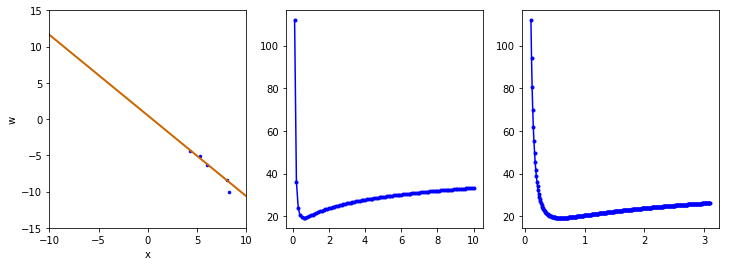

In [31]:
ns = 5
x_range = np.array([-10., 10.])
sg, phi, sgp = generate_nice_params()
x, w = generate_samples(x_range, sg, phi, ns)

plt.rcParams['figure.figsize'] = (12.0, 4.0)
plt.subplot(1,3,1)
plot_samples(x, w, phi)
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.xlabel("x")
plt.ylabel("w")

s1 = 0.1
s2 = 10.0
sg_candid = np.linspace(s1, s2, 100)
sg_eval = evaluate_sigma(x, w, sgp, sg_candid)
plt.subplot(1,3,2)
plt.plot(sg_candid, sg_eval, 'b.-')

idx = np.where(sg_eval == sg_eval.min())[0][0]
sg_inf = sg_candid[idx]
print('rough scan : ', sg_inf)

s1 = 0.1
s2 = 3.1
plt.subplot(1,3,3)
sg_candid = np.linspace(s1, s2, 301)
sg_eval = evaluate_sigma(x, w, sgp, sg_candid)
plt.plot(sg_candid, sg_eval, 'b.-')

idx = np.where(sg_eval == sg_eval.min())[0][0]
sg_inf = sg_candid[idx]
print(' fine scan : ', sg_inf)

print("true  : sg = {0:1.4f} \ninfer : sg = {1:1.4f}".format(sg, sg_inf))
sge = sg_inf

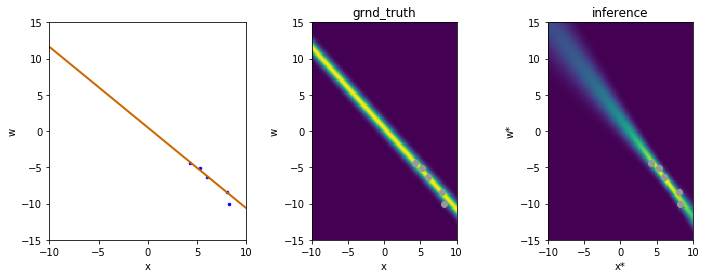

In [32]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.subplot(1,3,1)
plot_samples(x, w, phi)
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.xlabel("x")
plt.ylabel("w")

nres = 201
plt.subplot(1,3,2)
plot_rg_pdf(phi, sg, nres)
plt.scatter(x[1].squeeze(), w.squeeze(), color=(0.6, 0.6, 0.6))
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.title("grnd_truth")
plt.xlabel("x")
plt.ylabel("w")

res = np.linspace(-15, 15, nres)
xg, yg = np.meshgrid(res, res)
xs = xg.reshape(1, nres ** 2)
ys = yg.reshape(1, nres ** 2)
xs1 = np.vstack((np.ones(xs.shape[1]), xs))
mu, cov, phi, cinv = bayesian_inference(xs1, x, w, sge, sgp)
brg_pdf = spst.norm(mu, cov).pdf(ys.squeeze()).reshape((nres, nres))

plt.subplot(1,3,3)
rg_pdf = np.flipud(brg_pdf)
plt.imshow(rg_pdf, extent=[-15, 15, -15, 15])
plt.scatter(x[1].squeeze(), w.squeeze(), color=(0.6, 0.6, 0.6))
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.title("inference")
plt.xlabel("x*")
plt.ylabel("w*")


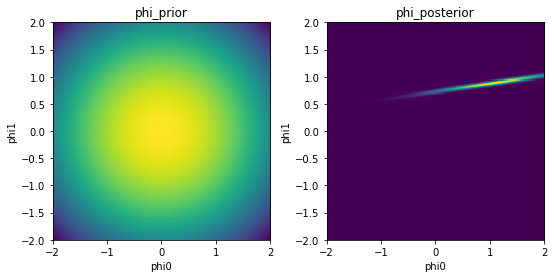

In [34]:
plt.rcParams['figure.figsize'] = (9.0, 4.0)

nres = 201
phi_prior_pdf = generate_phi_pdf(np.zeros(2), sgp*np.eye(2), nres, 3)
plt.subplot(1,2,1)
plt.imshow(phi_prior_pdf , extent=[-2, 2, -2, 2])
plt.title("phi_prior")
plt.xlabel("phi0")
plt.ylabel("phi1")

phi_posterior_pdf = generate_phi_pdf(phi.squeeze(), cinv, nres, 3)
plt.subplot(1,2,2)
plt.imshow(phi_posterior_pdf, extent=[-2, 2, -2, 2])
plt.title("phi_posterior")
plt.xlabel("phi0")
plt.ylabel("phi1")
